## Part 1: Setting Up the Code/Preprocessing
Link to find the data we are using: https://www.kaggle.com/datasets/fifthtribe/how-isis-uses-twitter?resource=download

Here we are loading up the dataset into our code.

In [ ]:
import numpy as np
import scipy
import pandas as pd
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('svg')
np.random.seed(0)
random.seed(0)

Below we are loading up the link to our github.

In [ ]:
! git clone https://github.com/Ldelatorre81/Poli_179_final_project.git

fatal: destination path 'Poli_179_final_project' already exists and is not an empty directory.


Loading up the data from the github and turning it into a dataset.

In [ ]:
df = pd.read_csv("Poli_179_final_project/data/DatasetISISTweets.csv")
df


,name,username,description,location,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...
...,...,...,...,...,...,...,...,...
17405,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:46,#Breaking\n#IslamicState \n#AmaqAgency \n\n#Fr...
17406,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:50,#Breaking\n\n Iraqi forces bulldozer destroyed...
17407,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:51,#Breaking \n#AmaqAgency \n#IslamicState \n\n#E...
17408,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 16:07,#PhotoReport \n#WilayatDimasiqh \n\n📷The Condu...


Subsetting the Data into 2015 & 2016 and convert the 'time' column to datetime.

In [ ]:
df['time'] = pd.to_datetime(df['time'])

# Subset the data
df_2015 = df[df['time'] < '2016-01-01']
df_2016 = df[df['time'] >= '2016-01-01']


Making all tweets lowercase for both datasets.

In [ ]:
df_2015['tweets'] = df_2015['tweets'].str.lower()
df_2015['tweets']

df_2015

df_2016['tweets'] = df_2016['tweets'].str.lower()
df_2016['tweets']

df_2016

<ipython-input-5-644abdc22ee4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['tweets'] = df_2015['tweets'].str.lower()
<ipython-input-5-644abdc22ee4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['tweets'] = df_2016['tweets'].str.lower()


,name,username,description,location,followers,numberstatuses,time,tweets
853,Maghrabi Arabie,MaghrabiArabi,"I'm not a terrorist , just an Islamic Analyst ...",Dunya,158,607,2016-01-01 05:04:00,@davidols you ppl are really joke
854,Maghrabi Arabie,MaghrabiArabi,"I'm not a terrorist , just an Islamic Analyst ...",Dunya,158,607,2016-01-01 08:46:00,@learnsomethlng this dubai ppl don't care abou...
855,Maghrabi Arabie,MaghrabiArabi,"I'm not a terrorist , just an Islamic Analyst ...",Dunya,158,607,2016-01-01 08:46:00,@qashrinaazri @learnsomethlng respect for what?
856,أبو أسامة الصومالي,CXaafada2,Degree from Tableeq(UK) | Masters from Alshaba...,Wilayat Hadramaut,866,370,2016-01-01 13:00:00,@ms_whitekitten_ that aint fair. at least i sa...
857,أبو أسامة الصومالي,CXaafada2,Degree from Tableeq(UK) | Masters from Alshaba...,Wilayat Hadramaut,866,370,2016-01-01 14:37:00,@j_eielamiya5 we are still waiting this👇\nhttp...
...,...,...,...,...,...,...,...,...
17405,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 15:46:00,#breaking\n#islamicstate \n#amaqagency \n\n#fr...
17406,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 15:50:00,#breaking\n\n iraqi forces bulldozer destroyed...
17407,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 15:51:00,#breaking \n#amaqagency \n#islamicstate \n\n#e...
17408,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 16:07:00,#photoreport \n#wilayatdimasiqh \n\n📷the condu...


Removing numbers and stop words from both datasets.

In [ ]:
#Remove numbers and stop words
from sklearn.feature_extraction.text import CountVectorizer

vrizer2015 = CountVectorizer(stop_words="english",  # remove stop words
                         analyzer="word",
                         token_pattern=r'(?u)\b[a-zA-Z]{2,}\b', # remove numbers
                         min_df = 3,
                         max_df = 0.95,
                         binary=True)

_ = vrizer2015.fit(df_2015['tweets'])
X = vrizer2015.transform(df_2015['tweets'])

df_2015

from sklearn.feature_extraction.text import CountVectorizer

vrizer2016 = CountVectorizer(stop_words="english",  # remove stop words
                         analyzer="word",
                         token_pattern=r'(?u)\b[a-zA-Z]{2,}\b', # remove numbers
                         min_df = 3,
                         max_df = 0.95,
                         binary=True)

_ = vrizer2016.fit(df_2016['tweets'])
X = vrizer2016.transform(df_2016['tweets'])

df_2016

,name,username,description,location,followers,numberstatuses,time,tweets
853,Maghrabi Arabie,MaghrabiArabi,"I'm not a terrorist , just an Islamic Analyst ...",Dunya,158,607,2016-01-01 05:04:00,@davidols you ppl are really joke
854,Maghrabi Arabie,MaghrabiArabi,"I'm not a terrorist , just an Islamic Analyst ...",Dunya,158,607,2016-01-01 08:46:00,@learnsomethlng this dubai ppl don't care abou...
855,Maghrabi Arabie,MaghrabiArabi,"I'm not a terrorist , just an Islamic Analyst ...",Dunya,158,607,2016-01-01 08:46:00,@qashrinaazri @learnsomethlng respect for what?
856,أبو أسامة الصومالي,CXaafada2,Degree from Tableeq(UK) | Masters from Alshaba...,Wilayat Hadramaut,866,370,2016-01-01 13:00:00,@ms_whitekitten_ that aint fair. at least i sa...
857,أبو أسامة الصومالي,CXaafada2,Degree from Tableeq(UK) | Masters from Alshaba...,Wilayat Hadramaut,866,370,2016-01-01 14:37:00,@j_eielamiya5 we are still waiting this👇\nhttp...
...,...,...,...,...,...,...,...,...
17405,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 15:46:00,#breaking\n#islamicstate \n#amaqagency \n\n#fr...
17406,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 15:50:00,#breaking\n\n iraqi forces bulldozer destroyed...
17407,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 15:51:00,#breaking \n#amaqagency \n#islamicstate \n\n#e...
17408,Anaksabil97,nvor85j,NaN,NaN,238,133,2016-05-13 16:07:00,#photoreport \n#wilayatdimasiqh \n\n📷the condu...


Removing https from all the tweets from both datasets.

In [ ]:
#Removing hhtps from all the tweets.

df_2015['tweets'] = df_2015['tweets'].str.replace(r'\bhttps?\b', '', regex=True)
df_2016['tweets'] = df_2016['tweets'].str.replace(r'\bhttps?\b', '', regex=True)


df_2016
df_2015

<ipython-input-7-f2f1ce3ff5e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['tweets'] = df_2015['tweets'].str.replace(r'\bhttps?\b', '', regex=True)
<ipython-input-7-f2f1ce3ff5e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['tweets'] = df_2016['tweets'].str.replace(r'\bhttps?\b', '', regex=True)


,name,username,description,location,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:07:00,english translation: 'a message to the truthfu...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:27:00,english translation: sheikh fatih al jawlani '...
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:29:00,english translation: first audio meeting with ...
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:37:00,english translation: sheikh nasir al wuhayshi ...
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:45:00,english translation: aqap: 'response to sheikh...
...,...,...,...,...,...,...,...,...
848,أبو أسامة الصومالي,CXaafada2,Degree from Tableeq(UK) | Masters from Alshaba...,Wilayat Hadramaut,866,370,2015-12-31 22:59:00,@_ummsayfullah_ lol sorry😊
849,أبو أسامة الصومالي,CXaafada2,Degree from Tableeq(UK) | Masters from Alshaba...,Wilayat Hadramaut,866,370,2015-12-31 23:01:00,@grayfr0 ameen. and may allah make it easy for...
850,أبو أسامة الصومالي,CXaafada2,Degree from Tableeq(UK) | Masters from Alshaba...,Wilayat Hadramaut,866,370,2015-12-31 23:25:00,@two_umm yes exactly..thanks for the translati...
851,أبو أسامة الصومالي,CXaafada2,Degree from Tableeq(UK) | Masters from Alshaba...,Wilayat Hadramaut,866,370,2015-12-31 23:30:00,@two_umm russian @_ummsayfullah_


Making both datasets into document term matrices.

In [ ]:
#Making Document Term Matrices
# Fit and transform 2015 data
X_2015 = vrizer2015.fit_transform(df_2015['tweets'])

# Fit and transform 2016 data
X_2016 = vrizer2016.fit_transform(df_2016['tweets'])

# Convert to dataframe if needed
df_2015_dfm = pd.DataFrame(X_2015.toarray(), columns=vrizer2015.get_feature_names_out())
df_2016_dfm = pd.DataFrame(X_2016.toarray(), columns=vrizer2016.get_feature_names_out())

## Part 2: LDA Analysis

Below we are doing an LDA analysis for both datasets. We used 5 topics because it yielded the biggest coherence score.

In [ ]:
# LDA Analysis
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import numpy as np

# Define a function to compute the coherence score
def compute_coherence_score(texts, topics):
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    coherence_model_lda = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()

# Function to get topics from LDA model
def get_topics(lda_model, vectorizer):
    keywords = np.array(vectorizer.get_feature_names_out())
    topics = []
    for topic_weights in lda_model.components_:
        top_keywords_locs = (-topic_weights).argsort()[:10]
        topics.append([keywords[i] for i in top_keywords_locs])
    return topics

# Define the number of topics
num_topics = 5  # You can adjust this number as needed

# Initialize LDA models
lda_model_2015 = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda_model_2016 = LatentDirichletAllocation(n_components=num_topics, random_state=0)

# Fit LDA models
lda_model_2015.fit(X_2015)
lda_model_2016.fit(X_2016)

# Get topics
topics_2015 = get_topics(lda_model_2015, vrizer2015)
topics_2016 = get_topics(lda_model_2016, vrizer2016)

# Print top words for each topic
print("Top words for 2015 Data:")
for i, topic in enumerate(topics_2015):
    print(f"Topic {i+1}: {', '.join(topic)}")

print("\nTop words for 2016 Data:")
for i, topic in enumerate(topics_2016):
    print(f"Topic {i+1}: {', '.join(topic)}")

# Convert document-term matrices to lists of lists of strings
texts_2015 = [list(vrizer2015.get_feature_names_out()[doc.nonzero()[1]]) for doc in X_2015]
texts_2016 = [list(vrizer2016.get_feature_names_out()[doc.nonzero()[1]]) for doc in X_2016]

# Calculate coherence scores
coherence_score_2015 = compute_coherence_score(texts_2015, topics_2015)
coherence_score_2016 = compute_coherence_score(texts_2016, topics_2016)

print(f"Coherence Score for 2015 Data: {coherence_score_2015}")
print(f"Coherence Score for 2016 Data: {coherence_score_2016}")


Top words for 2015 Data:
Topic 1: islamicstate, iraqi, army, ramadi, amp, soldiers, west, city, know, aleppo
Topic 2: akhijibran, lol, amp, like, somaliyyah, killed, ishmael, media, syrian, regime
Topic 3: rt, syria, isis, al, ramiallolah, russia, killed, abu, muslims, sheikh
Topic 4: allah, rt, soon, wilayathalab, akhi, new, twitter, ya, statement, coming
Topic 5: islamic, state, wilayatninawa, know, syria, rt, fighters, just, news, did

Top words for 2016 Data:
Topic 1: rt, la, le, est, isis, twitter, les, des, je, pas
Topic 2: rt, syria, isis, amp, turkey, ypg, al, ramiallolah, aleppo, russia
Topic 3: isis, rt, syria, state, assad, islamic, aleppo, palmyra, killed, saa
Topic 4: rt, allah, al, amp, muslims, islam, don, people, like, know
Topic 5: rt, killed, isis, iraq, army, al, today, iraqi, near, soldiers
Coherence Score for 2015 Data: 0.38870966790050004
Coherence Score for 2016 Data: 0.5468517250449392


## Part 3: Time Series


Running a time series that shows the number of tweets per topic for every month that the dataset collected tweets.

<ipython-input-10-175c8a7cfd5e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['topic'] = np.argmax(topic_distribution_2015, axis=1)
<ipython-input-10-175c8a7cfd5e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['topic'] = np.argmax(topic_distribution_2016, axis=1)


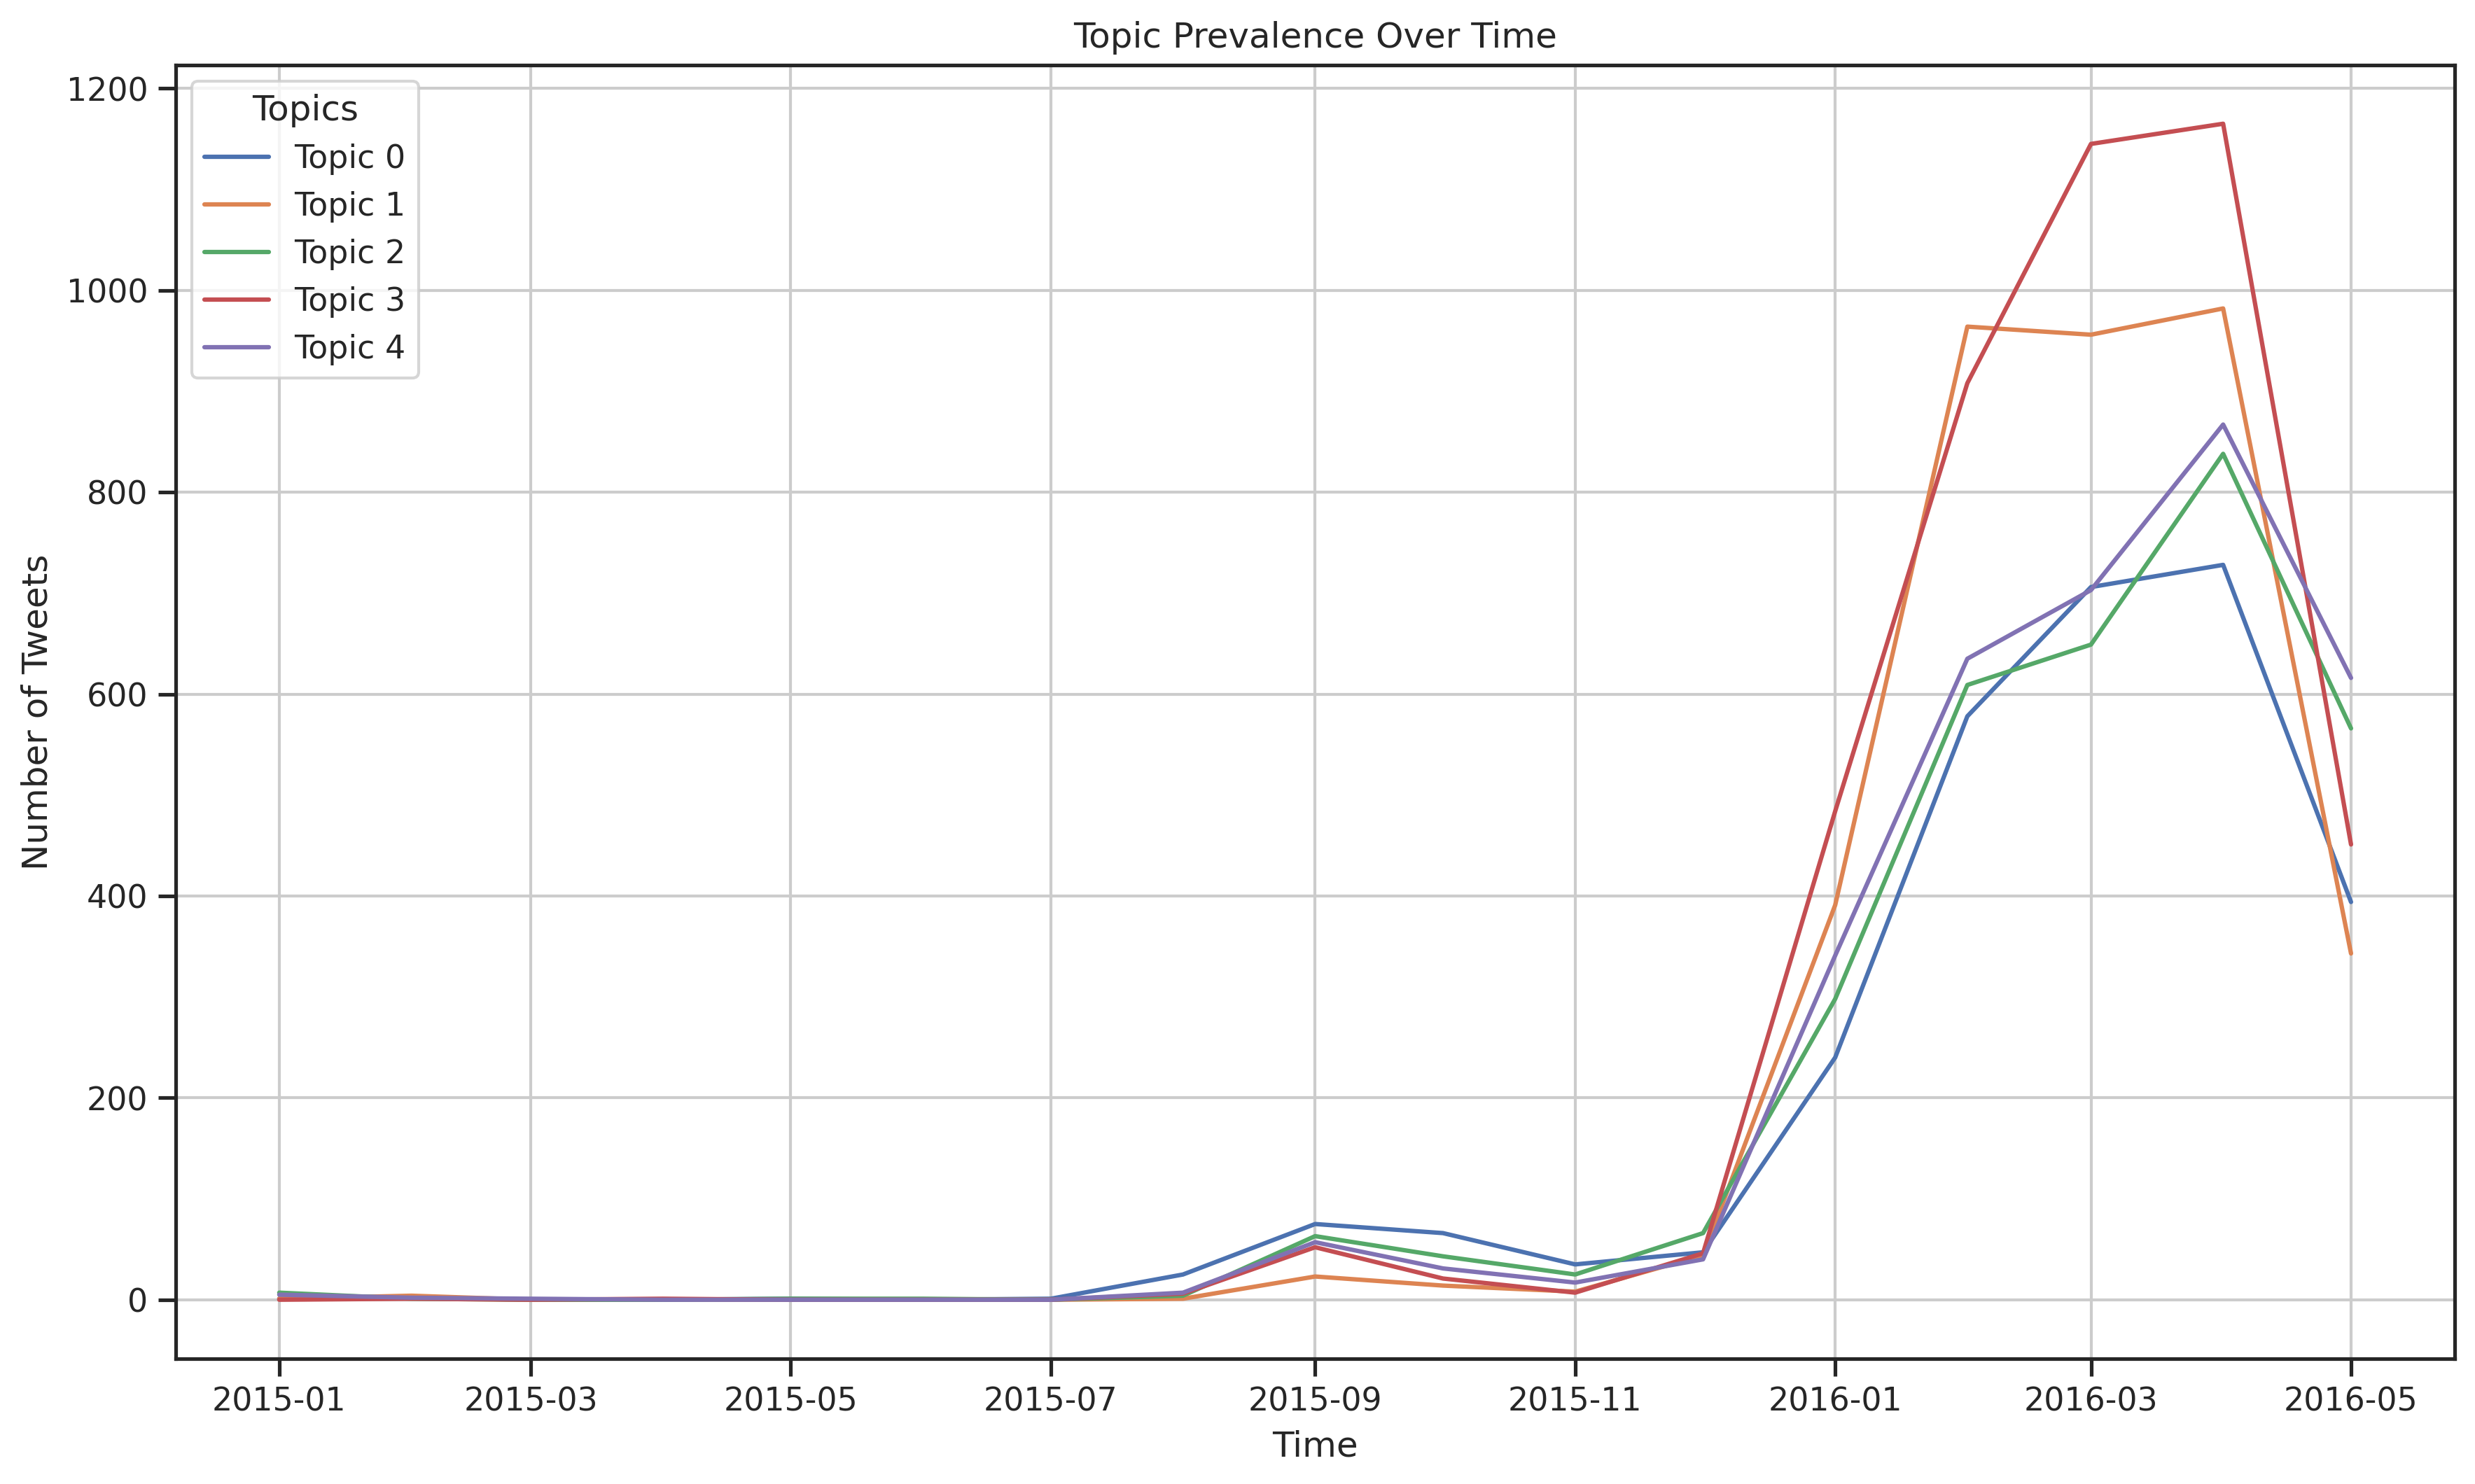

In [ ]:
# Time Series
# Get the topic distribution for each tweet
topic_distribution_2015 = lda_model_2015.transform(X_2015)
topic_distribution_2016 = lda_model_2016.transform(X_2016)

# Assign the most probable topic to each tweet
df_2015['topic'] = np.argmax(topic_distribution_2015, axis=1)
df_2016['topic'] = np.argmax(topic_distribution_2016, axis=1)

# Combine the two DataFrames
df_combined = pd.concat([df_2015, df_2016])

# Extract year and month
df_combined['year_month'] = df_combined['time'].dt.to_period('M')

# Count the number of tweets per topic per month
topic_prevalence = df_combined.groupby(['year_month', 'topic']).size().unstack(fill_value=0)

# Plot the time series
plt.figure(figsize=(14, 8))
for topic in topic_prevalence.columns:
    plt.plot(topic_prevalence.index.to_timestamp(), topic_prevalence[topic], label=f'Topic {topic}')

plt.title('Topic Prevalence Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.legend(title='Topics')
plt.grid(True)
plt.show()

## Part 4: Word Embeddings Using Word2Vec

Below we are using word embeddings for the 2015 and 2016 dataset.




In [ ]:
# Word Embeddings Using Word2Vec
from gensim.models import Word2Vec
tweets_2015 = df_2015['tweets'].apply(lambda x: x.split())
tweets_2016 = df_2016['tweets'].apply(lambda x: x.split())

model_2015 = Word2Vec(sentences=tweets_2015, vector_size=100, window=5, min_count=3, workers=4, sg=1)
model_2015.train(tweets_2015, total_examples=len(tweets_2015), epochs=10)

model_2016 = Word2Vec(sentences=tweets_2016, vector_size=100, window=5, min_count=3, workers=4, sg=1)
model_2016.train(tweets_2016, total_examples=len(tweets_2016), epochs=10)

# Example analysis: Finding similar words
word = 'isis'
similar_words_2015 = model_2015.wv.most_similar(word, topn=10)
similar_words_2016 = model_2016.wv.most_similar(word, topn=10)

print(f"Top words similar to '{word}' in 2015 data:")
print(similar_words_2015)

print(f"Top words similar to '{word}' in 2016 data:")
print(similar_words_2016)

def get_word_clusters(model, words, topn=10):
    clusters = {}
    for word in words:
        if word in model.wv:
            clusters[word] = model.wv.most_similar(word, topn=topn)
    return clusters

words_to_check = ['isis', 'syria', 'attack', 'allah']  # Example words
clusters_2015 = get_word_clusters(model_2015, words_to_check)
clusters_2016 = get_word_clusters(model_2016, words_to_check)

print("Word clusters for 2015 data:")
for word, cluster in clusters_2015.items():
    print(f"Top words similar to '{word}' in 2015 data:")
    print(cluster)

print("Word clusters for 2016 data:")
for word, cluster in clusters_2016.items():
    print(f"Top words similar to '{word}' in 2016 data:")
    print(cluster)

Top words similar to 'isis' in 2015 data:
[('over', 0.9942445158958435), ('mujahideen', 0.993769645690918), ('up', 0.9932168126106262), ('people', 0.9927654266357422), ('fsa', 0.9922153949737549), ('muslim', 0.9921078681945801), ('caliphate', 0.9920799136161804), ('russian', 0.9917489290237427), ('&gt;&gt;', 0.9914289116859436), ('set', 0.9912525415420532)]
Top words similar to 'isis' in 2016 data:
[("isis'", 0.5866726636886597), ('isis.', 0.5314374566078186), ("al-qaeda's", 0.529798150062561), ('fsa', 0.5251449346542358), ('@warreporter1:', 0.5046315789222717), ('long-term', 0.499137282371521), ('@thomasjoscelyn:', 0.49812546372413635), ('justifies', 0.49275368452072144), ('tactical', 0.49122026562690735), ('yemen', 0.4878314137458801)]
Word clusters for 2015 data:
Top words similar to 'isis' in 2015 data:
[('over', 0.9942445158958435), ('mujahideen', 0.993769645690918), ('up', 0.9932168126106262), ('people', 0.9927654266357422), ('fsa', 0.9922153949737549), ('muslim', 0.9921078681945

## Part 5: Visual Representation of results from Word Embedding

Below you can find the code for the word clouds we did for the word embeddings above.


Word Clouds for 2015 Data:


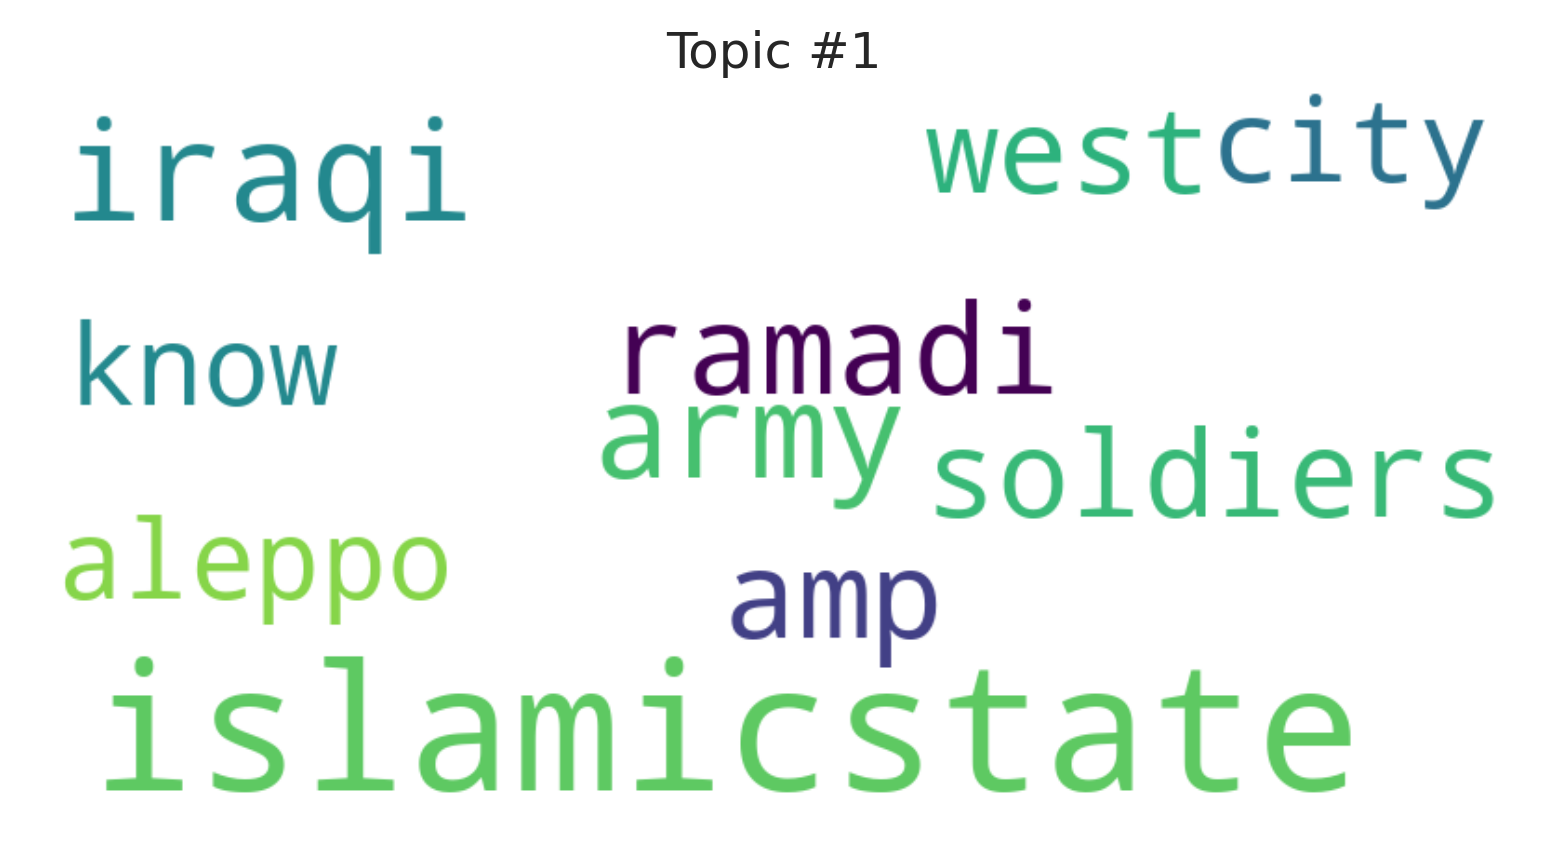

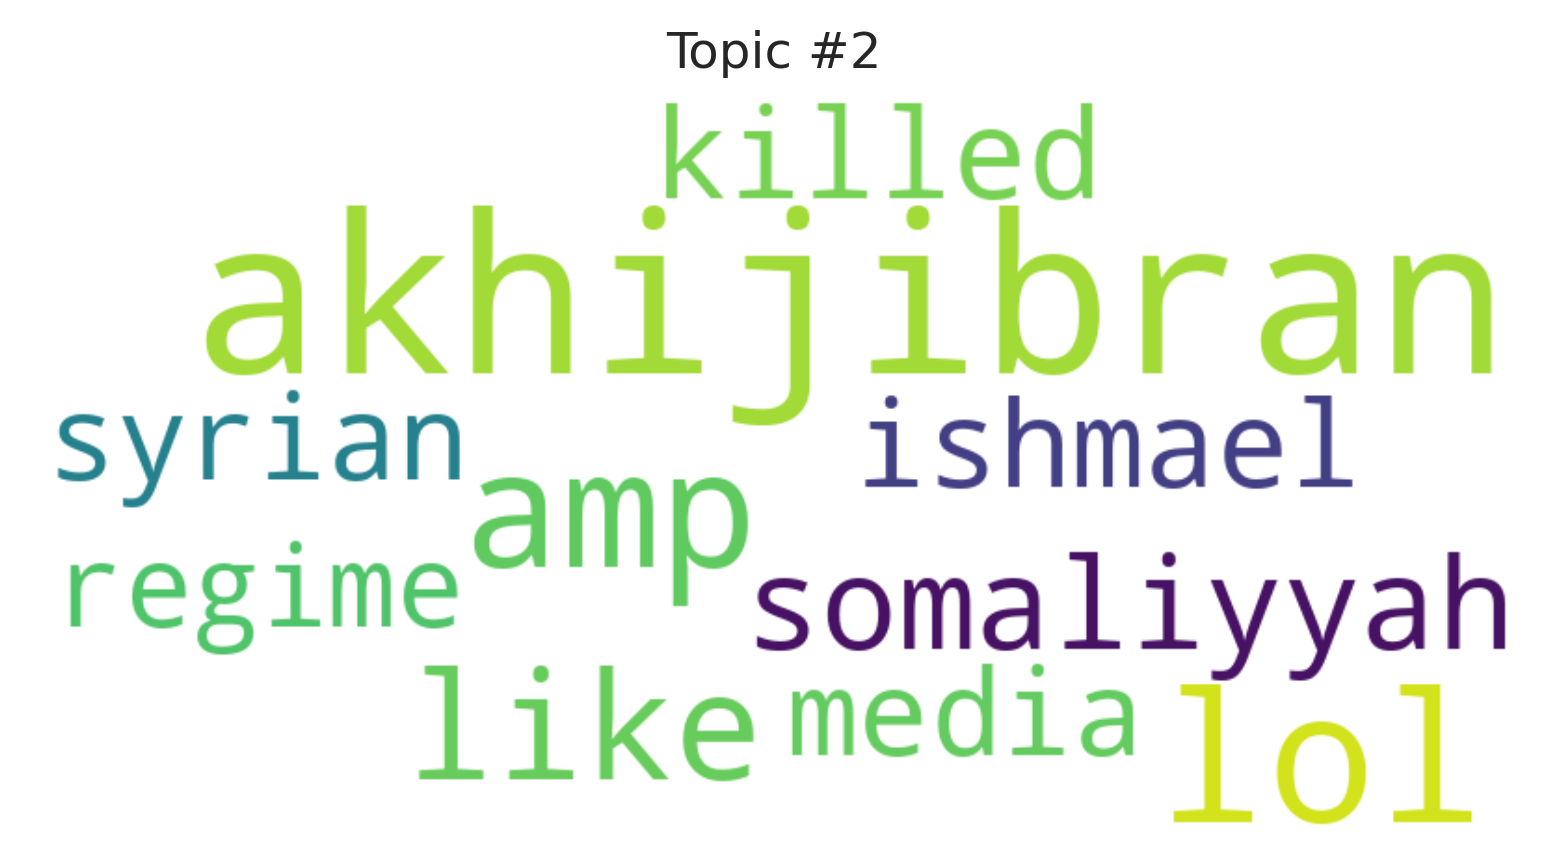

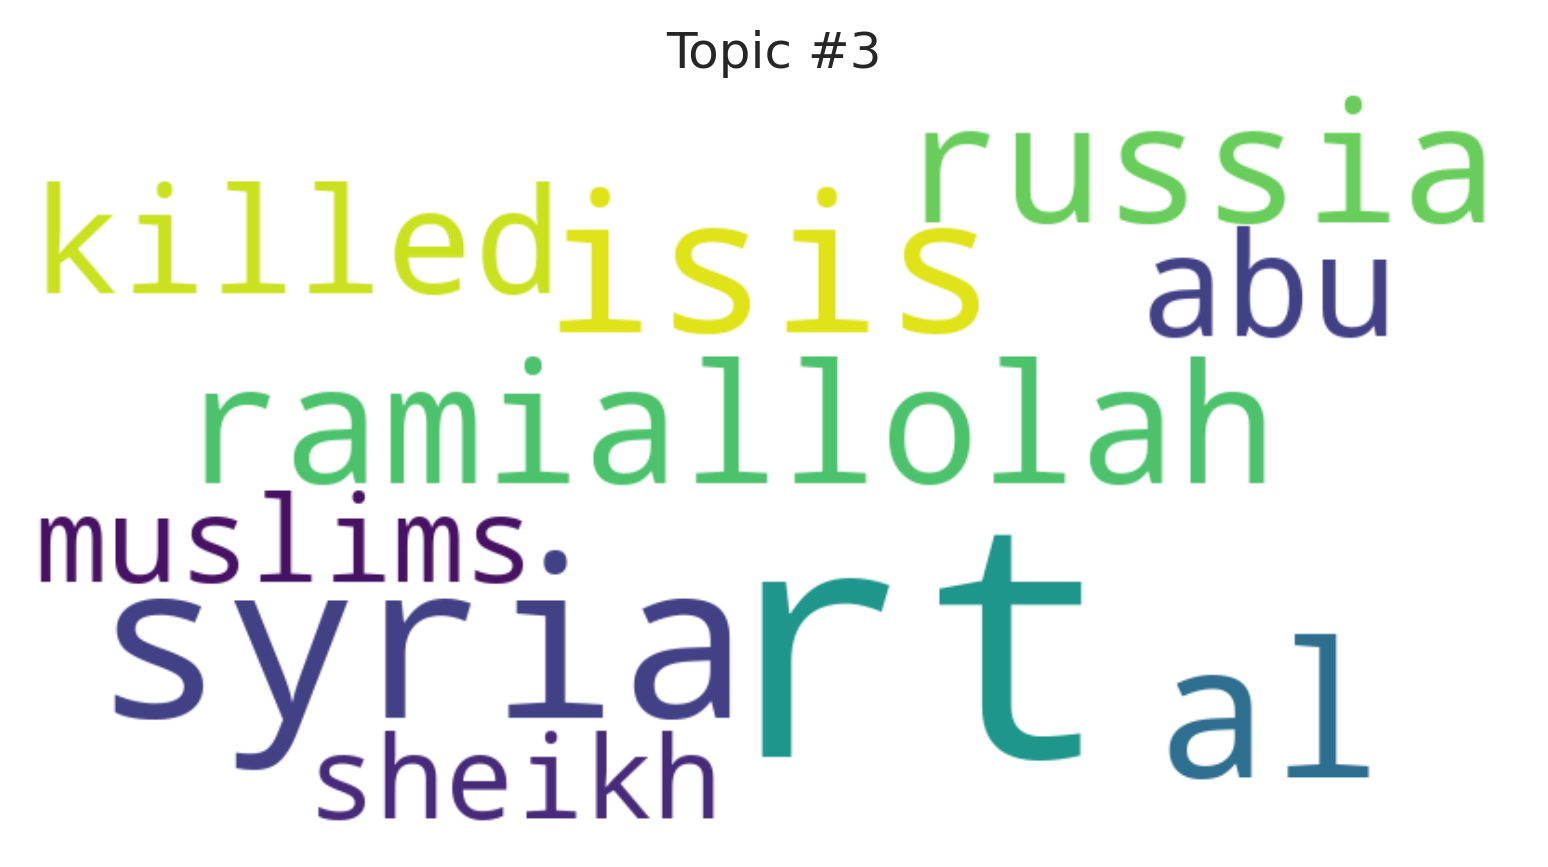

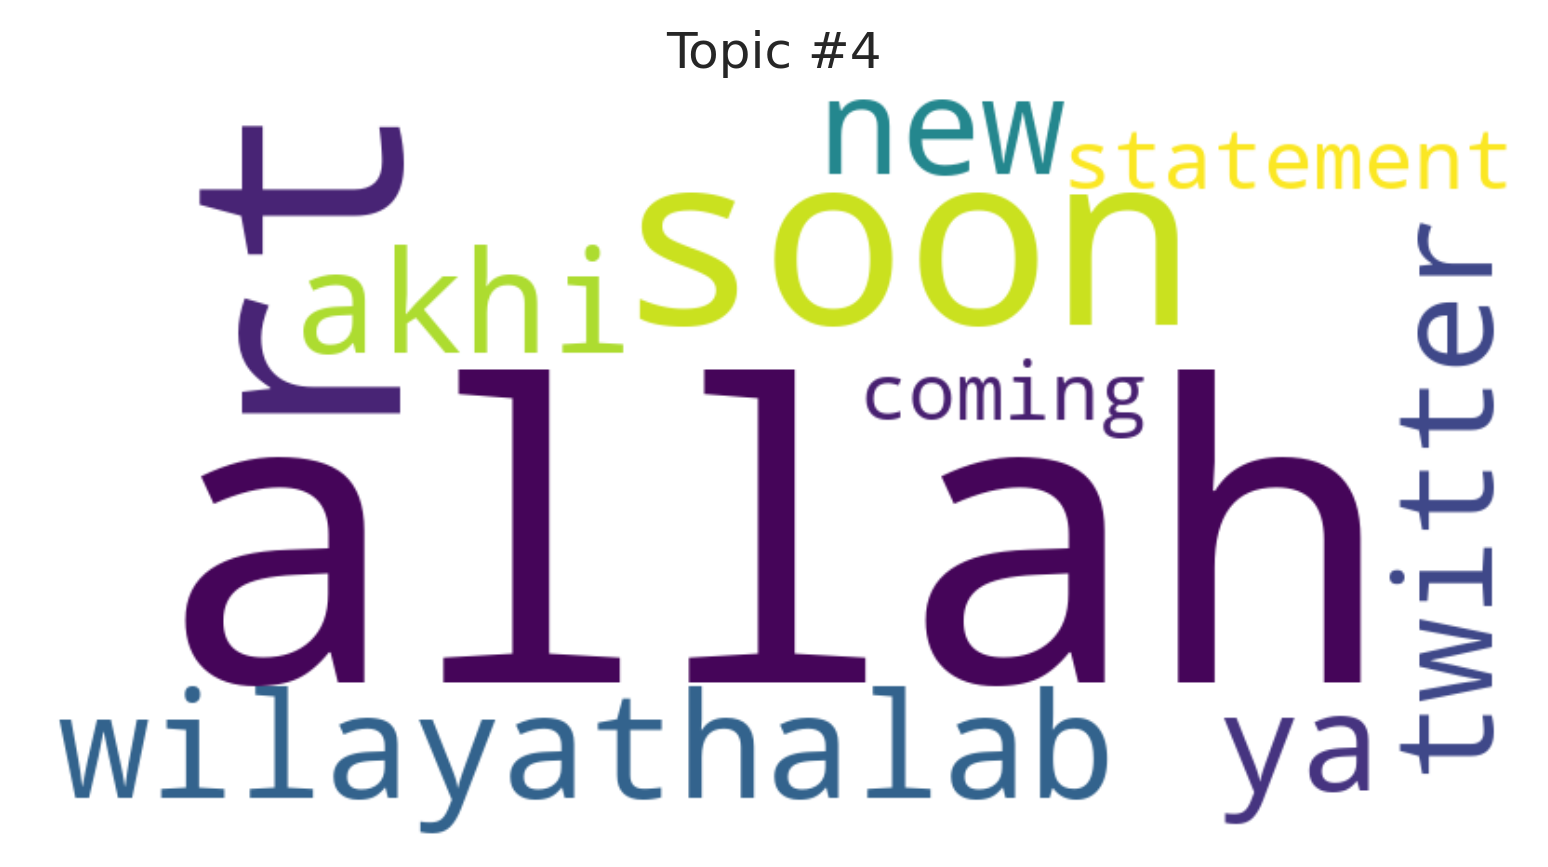

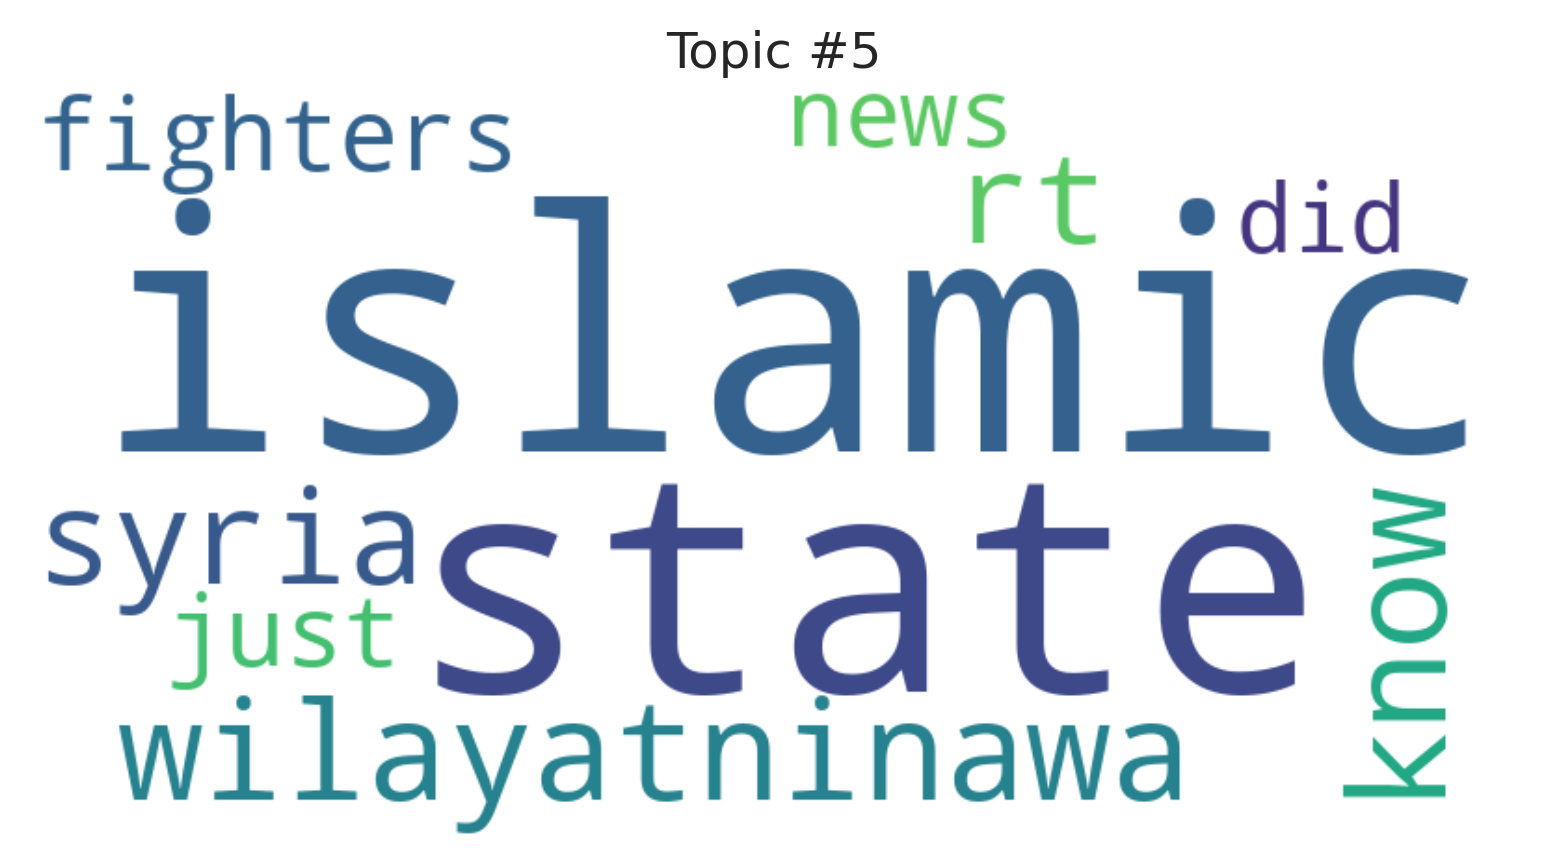

Word Clouds for 2016 Data:


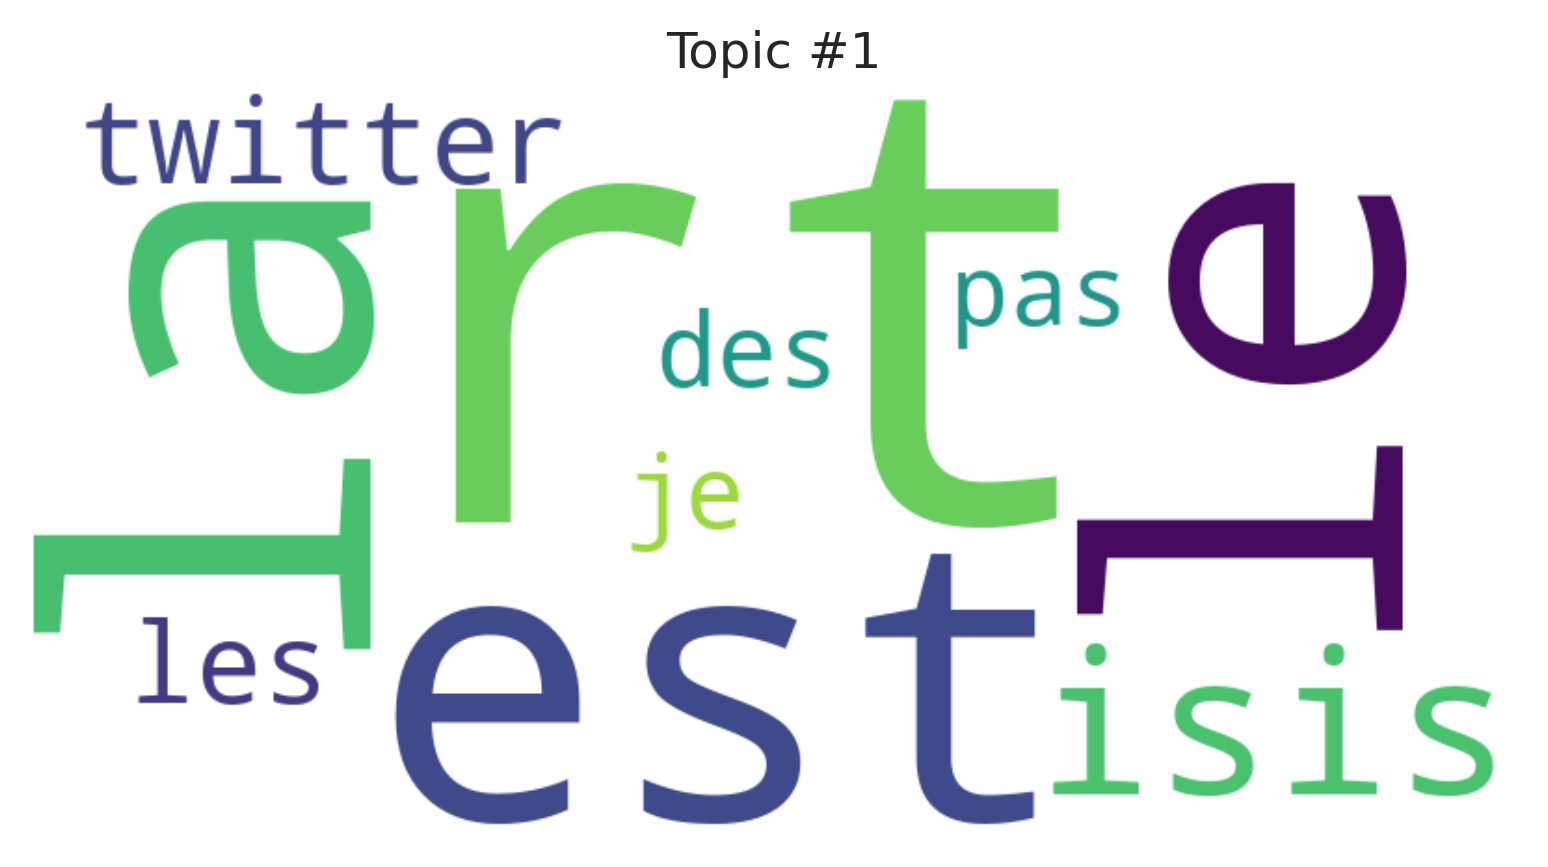

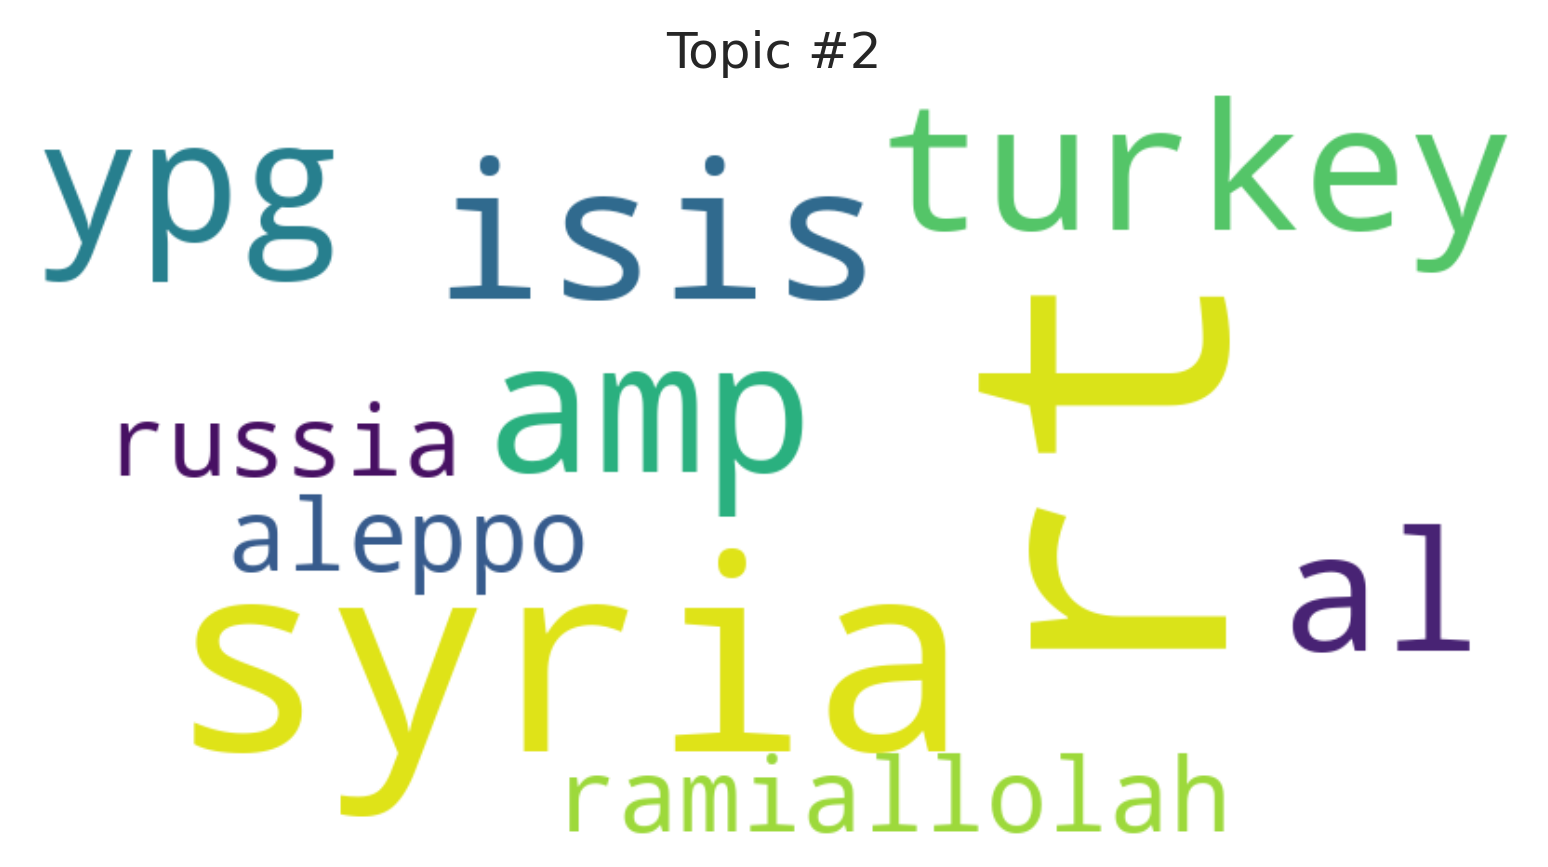

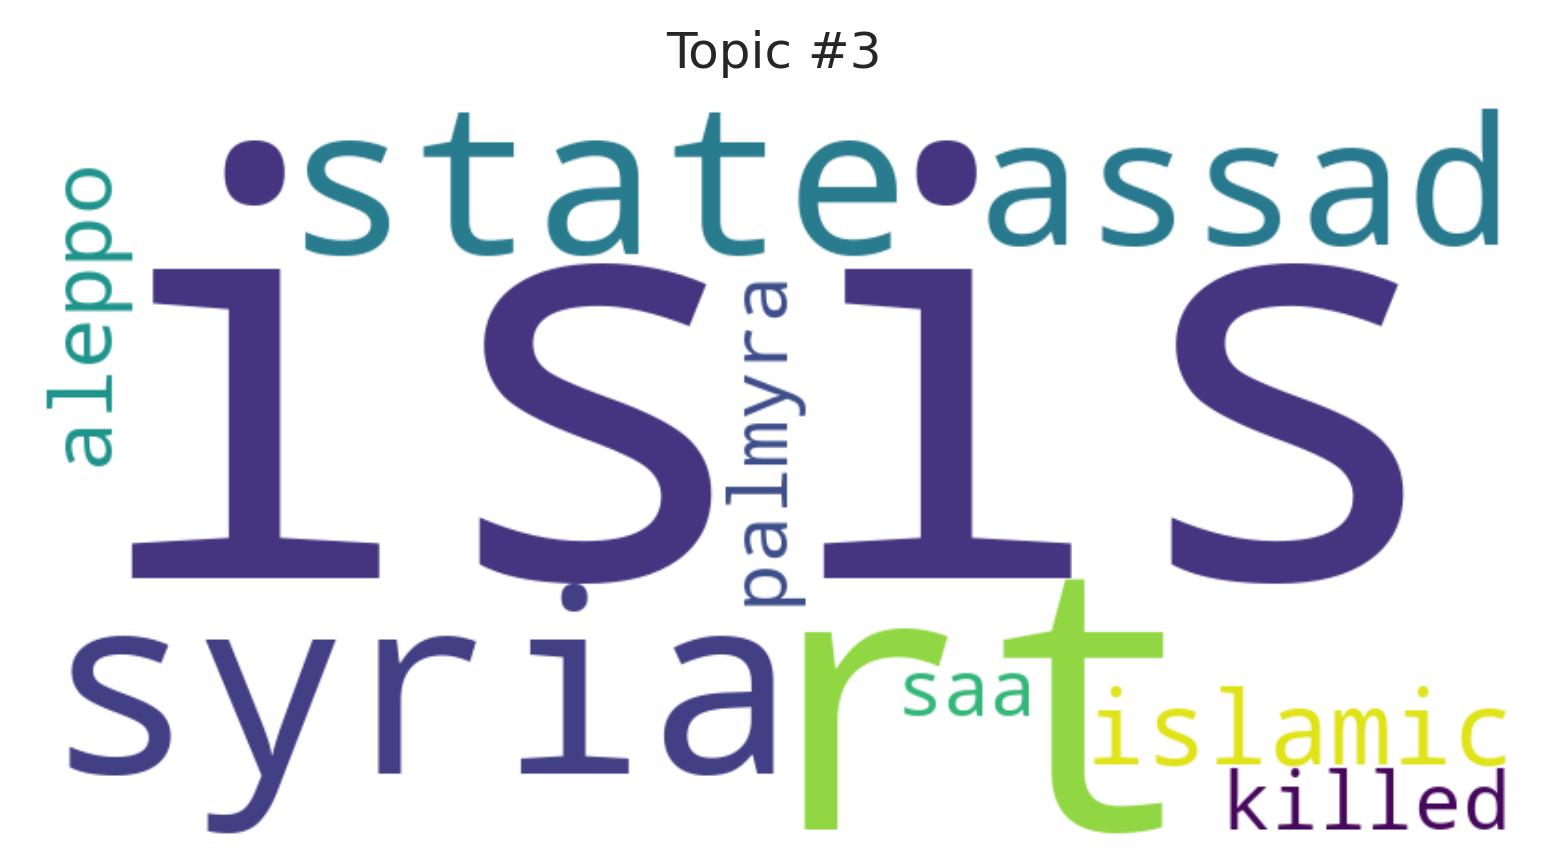

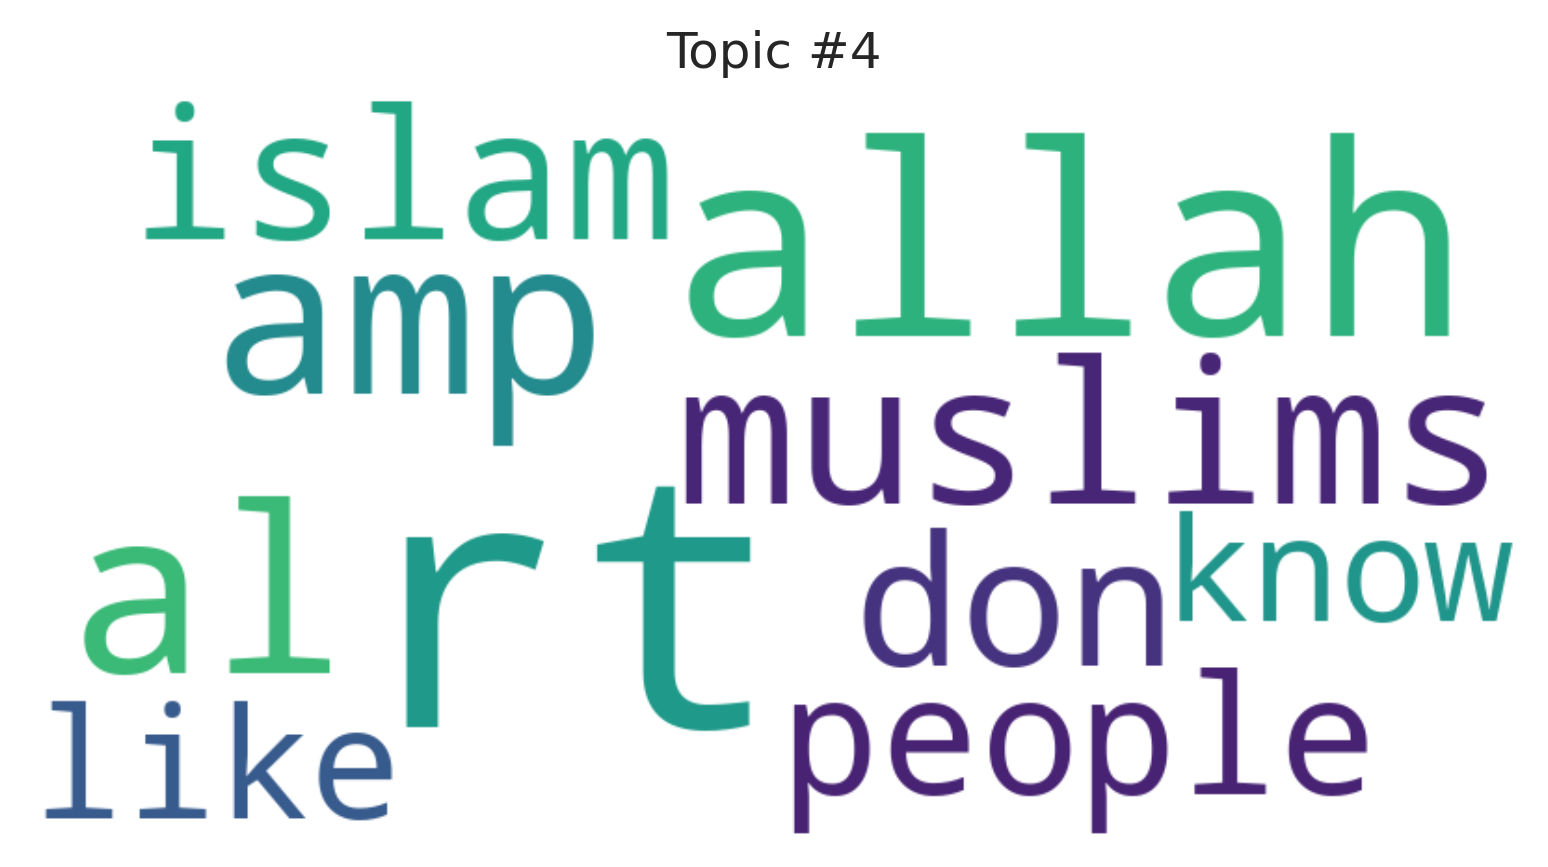

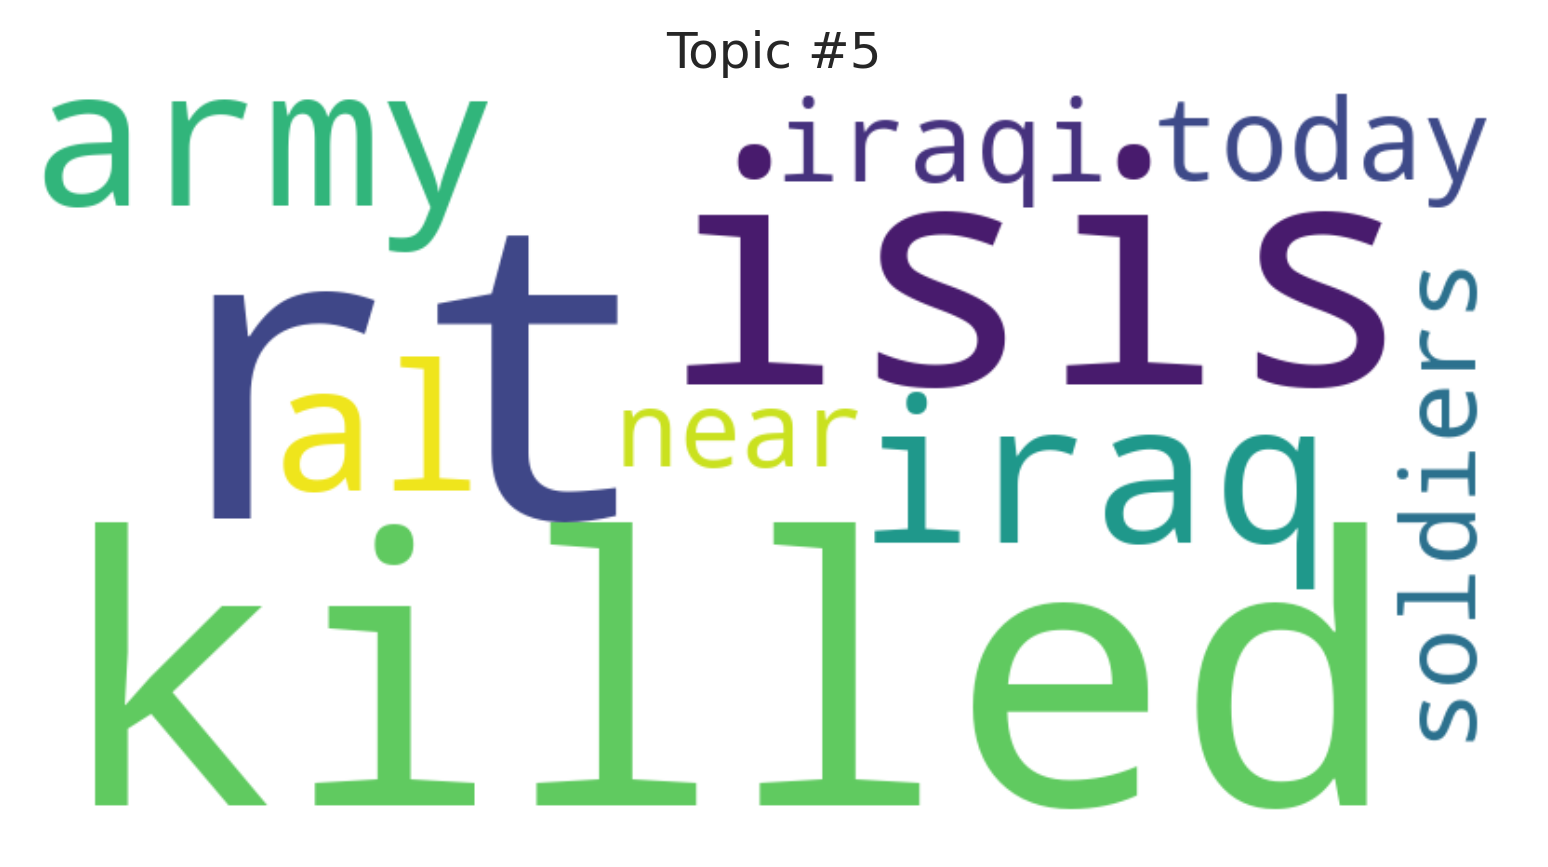

In [ ]:
# Visual Representation of Topics From LDA
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create and display word clouds for each topic
def plot_word_clouds(topics, num_topics):
    for i, topic in enumerate(topics):
        # Create a dictionary with words and their weights
        word_freq = {word: weight for word, weight in topic}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure()
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Topic #{i+1}')
        plt.show()

# Adjust the get_topics function to include weights
def get_topics_with_weights(lda_model, vectorizer):
    keywords = np.array(vectorizer.get_feature_names_out())
    topics = []
    for topic_weights in lda_model.components_:
        top_keywords_locs = (-topic_weights).argsort()[:10]
        topics.append([(keywords[i], topic_weights[i]) for i in top_keywords_locs])
    return topics

# Get topics with weights for word cloud generation
topics_2015_with_weights = get_topics_with_weights(lda_model_2015, vrizer2015)
topics_2016_with_weights = get_topics_with_weights(lda_model_2016, vrizer2016)

# Plot word clouds for 2015 data
print("Word Clouds for 2015 Data:")
plot_word_clouds(topics_2015_with_weights, num_topics)

# Plot word clouds for 2016 data
print("Word Clouds for 2016 Data:")
plot_word_clouds(topics_2016_with_weights, num_topics)
